In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('chatbot_data_trip.csv')

In [3]:
df

,Unnamed: 0,sentence,label
0,0,인사드립니다.,0
1,1,인사하려고 했는데 짝남이 먼저 인사해줬어. 더 떨렸겠어요.,0
2,2,인사할까 했는데 짝녀가 먼저 인사해줬어. 기분 좋았겠네요.,0
3,3,집에 인사드리러 가 제가 더 떨리네요.,0
4,4,마무리 가벼운 안부 인사일 거예요.,0
...,...,...,...
617,617,했는데. 좋겠어요.,3
618,618,했어 좋겠어요.,3
619,619,다 돈이다. 많이 들지만 줄일 수 있을 거예요.,3
620,620,가기 귀찮아 경조사는 참석하는게 좋아요.,3


In [4]:
del df['Unnamed: 0']

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 622 entries, 0 to 621
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sentence  622 non-null    object
 1   label     622 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 9.8+ KB


In [6]:
import re
import warnings
warnings.filterwarnings(action='ignore')

In [7]:
df['sentence'] = df['sentence'].apply(lambda x: re.sub(r'[^ ㄱ-ㅣ가-힣]+', '', x))
df['sentence'][100:105]

100                             매서운 바람에 옷깃을 여미게 되는 겨울입니다
101                     연인 친구와 함께 올해 마지막 추억을 만들어 가는 월입니다
102                      매서운 바람이 가을을 몰아내고 겨울을 가지고 들어 왔네요
103                 해를 보내는 아쉬운 마음과 새해를 맞는 설레임이 교차하는 월입니다
104    다짐했던 계획들 잘 정리하고 계신가요 남은 날들 계획한 모든 일들이 잘 이루어지기를...
Name: sentence, dtype: object

In [8]:
df

,sentence,label
0,인사드립니다,0
1,인사하려고 했는데 짝남이 먼저 인사해줬어 더 떨렸겠어요,0
2,인사할까 했는데 짝녀가 먼저 인사해줬어 기분 좋았겠네요,0
3,집에 인사드리러 가 제가 더 떨리네요,0
4,마무리 가벼운 안부 인사일 거예요,0
...,...,...
617,했는데 좋겠어요,3
618,했어 좋겠어요,3
619,다 돈이다 많이 들지만 줄일 수 있을 거예요,3
620,가기 귀찮아 경조사는 참석하는게 좋아요,3


In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from konlpy.tag import Okt

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\image.py:167: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int):


In [10]:
okt = Okt()

In [11]:
tfidf = TfidfVectorizer(
                        ngram_range=(1, 2),       # 두 묶음의 단어까지 인덱스 부여
                        min_df = 3,               # 단어가 포함된 문장의 개수가 3개 이상일 때 인덱스 부여
                        max_df = 0.9)  

In [12]:
tfidf.fit(df['sentence'])

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=0.9, max_features=None,
                min_df=3, ngram_range=(1, 2), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [13]:
tfidf.vocabulary_

{'했는데': 254,
 '먼저': 90,
 '집에': 223,
 '거예요': 18,
 '이제': 170,
 '마세요': 80,
 '마지막': 83,
 '바랍니다': 105,
 '마음에': 81,
 '안녕히': 142,
 '주무세요': 218,
 '안녕히 주무세요': 143,
 '안녕': 140,
 '안녕하세요': 141,
 '어떻게': 145,
 '정말': 192,
 '해보세요': 250,
 '느낄': 37,
 '있는': 176,
 '계절입니다': 26,
 '있습니다': 177,
 '느낄 있습니다': 38,
 '주는': 216,
 '계절': 20,
 '봄입니다': 113,
 '계절 봄입니다': 22,
 '계절의': 24,
 '여왕': 154,
 '계절의 여왕': 25,
 '봄이': 111,
 '찾아왔습니다': 224,
 '왔습니다': 160,
 '계절 봄이': 21,
 '봄이 왔습니다': 112,
 '가득한': 7,
 '있을': 181,
 '같은': 16,
 '어느새': 144,
 '바로': 106,
 '합니다': 248,
 '즐거운': 221,
 '떠오르는': 57,
 '따뜻한': 55,
 '문득': 98,
 '월입니다': 163,
 '좋은': 212,
 '아름다운': 139,
 '산과': 120,
 '너무': 34,
 '오늘': 158,
 '하는': 237,
 '함께': 247,
 '곳으로': 27,
 '같습니다': 13,
 '같은데': 17,
 '벌써': 108,
 '가고': 0,
 '느껴지는': 36,
 '여름입니다': 153,
 '계절 여름입니다': 23,
 '시원한': 134,
 '시간을': 132,
 '시간이': 133,
 '때문에': 56,
 '많이': 86,
 '해도': 249,
 '언제': 148,
 '만들어': 84,
 '없이': 152,
 '추천': 225,
 '원해요': 161,
 '해야': 251,
 '되요': 49,
 '해야 되요': 252,
 '하고': 235,
 '싶은데': 138,
 '싶다': 135,
 '할게요': 242,


In [46]:
import pickle

In [48]:
f = open('tfidf_chatbot.pkl', 'wb')
pickle.dump(tfidf, f)
f.close()

In [14]:
tfidf_df= tfidf.transform(df['sentence'])

In [15]:
tfidf_df

<622x257 sparse matrix of type '<class 'numpy.float64'>'
	with 1472 stored elements in Compressed Sparse Row format>

In [16]:
len(tfidf_df.toarray())

622

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(tfidf_df.toarray(), df['label'], test_size= 0.2, random_state=55)

In [19]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [20]:
X_train.shape

(497, 257)

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, SimpleRNN, LSTM

In [22]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [23]:
embedding_dim=100
hidden_units=128

model=Sequential()
model.add(Embedding(497, embedding_dim))
model.add(LSTM(hidden_units))
model.add(Dense(4, activation="softmax"))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 100)         49700     
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense (Dense)               (None, 4)                 516       
                                                                 
Total params: 167,464
Trainable params: 167,464
Non-trainable params: 0
_________________________________________________________________


In [25]:
es=EarlyStopping(patience=100, restore_best_weights=True)
cp=ModelCheckpoint('best_chatbot_LSTM.h5')
history=model.fit(X_train, y_train, batch_size=128, epochs=100, validation_data=(X_test, y_test),
                      callbacks=[es, cp], verbose=2)

Epoch 1/100
4/4 - 4s - loss: 1.3790 - accuracy: 0.3038 - val_loss: 1.3795 - val_accuracy: 0.2720 - 4s/epoch - 896ms/step
Epoch 2/100
4/4 - 1s - loss: 1.3590 - accuracy: 0.3521 - val_loss: 1.3950 - val_accuracy: 0.2720 - 1s/epoch - 358ms/step
Epoch 3/100
4/4 - 1s - loss: 1.3552 - accuracy: 0.3521 - val_loss: 1.3905 - val_accuracy: 0.2720 - 1s/epoch - 353ms/step
Epoch 4/100
4/4 - 1s - loss: 1.3537 - accuracy: 0.3521 - val_loss: 1.3876 - val_accuracy: 0.2720 - 1s/epoch - 343ms/step
Epoch 5/100
4/4 - 1s - loss: 1.3545 - accuracy: 0.3521 - val_loss: 1.3884 - val_accuracy: 0.2720 - 1s/epoch - 343ms/step
Epoch 6/100
4/4 - 1s - loss: 1.3558 - accuracy: 0.3521 - val_loss: 1.3931 - val_accuracy: 0.2720 - 1s/epoch - 352ms/step
Epoch 7/100
4/4 - 1s - loss: 1.3539 - accuracy: 0.3521 - val_loss: 1.3902 - val_accuracy: 0.2720 - 1s/epoch - 359ms/step
Epoch 8/100
4/4 - 1s - loss: 1.3535 - accuracy: 0.3521 - val_loss: 1.3885 - val_accuracy: 0.2720 - 1s/epoch - 354ms/step
Epoch 9/100
4/4 - 1s - loss: 1.3

Epoch 69/100
4/4 - 1s - loss: 1.2978 - accuracy: 0.4064 - val_loss: 1.2981 - val_accuracy: 0.3520 - 1s/epoch - 364ms/step
Epoch 70/100
4/4 - 1s - loss: 1.2954 - accuracy: 0.4064 - val_loss: 1.2900 - val_accuracy: 0.3520 - 1s/epoch - 375ms/step
Epoch 71/100
4/4 - 1s - loss: 1.2935 - accuracy: 0.4064 - val_loss: 1.2858 - val_accuracy: 0.3520 - 1s/epoch - 355ms/step
Epoch 72/100
4/4 - 1s - loss: 1.2922 - accuracy: 0.4064 - val_loss: 1.2888 - val_accuracy: 0.3520 - 1s/epoch - 356ms/step
Epoch 73/100
4/4 - 1s - loss: 1.2916 - accuracy: 0.4064 - val_loss: 1.2927 - val_accuracy: 0.3520 - 1s/epoch - 354ms/step
Epoch 74/100
4/4 - 1s - loss: 1.2899 - accuracy: 0.4064 - val_loss: 1.2858 - val_accuracy: 0.3520 - 1s/epoch - 369ms/step
Epoch 75/100
4/4 - 1s - loss: 1.2881 - accuracy: 0.4125 - val_loss: 1.2884 - val_accuracy: 0.3600 - 1s/epoch - 357ms/step
Epoch 76/100
4/4 - 1s - loss: 1.2887 - accuracy: 0.4125 - val_loss: 1.2945 - val_accuracy: 0.3600 - 1s/epoch - 358ms/step
Epoch 77/100
4/4 - 1s - 

In [26]:
model2 = Sequential()
model2.add(Dense(128, activation='relu', input_dim=257))
model2.add(Dense(64, activation='relu'))
model2.add(Dense(32, activation='relu'))
model2.add(Dense(10, activation='relu'))
model2.add(Dense(4, activation='softmax'))
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [27]:
es2=EarlyStopping(patience=500, restore_best_weights=True)
cp2=ModelCheckpoint('best_chatbot2.h5')
history2=model2.fit(X_train, y_train, batch_size=128, epochs=500, validation_data=(X_test, y_test),
                      callbacks=[es2, cp2], verbose=2)

Epoch 1/500
4/4 - 0s - loss: 1.3791 - accuracy: 0.2958 - val_loss: 1.3721 - val_accuracy: 0.3680 - 446ms/epoch - 112ms/step
Epoch 2/500
4/4 - 0s - loss: 1.3602 - accuracy: 0.3843 - val_loss: 1.3573 - val_accuracy: 0.2720 - 51ms/epoch - 13ms/step
Epoch 3/500
4/4 - 0s - loss: 1.3382 - accuracy: 0.3561 - val_loss: 1.3392 - val_accuracy: 0.2720 - 45ms/epoch - 11ms/step
Epoch 4/500
4/4 - 0s - loss: 1.3117 - accuracy: 0.3541 - val_loss: 1.3160 - val_accuracy: 0.2720 - 44ms/epoch - 11ms/step
Epoch 5/500
4/4 - 0s - loss: 1.2806 - accuracy: 0.3561 - val_loss: 1.2875 - val_accuracy: 0.2720 - 46ms/epoch - 11ms/step
Epoch 6/500
4/4 - 0s - loss: 1.2410 - accuracy: 0.3742 - val_loss: 1.2506 - val_accuracy: 0.3520 - 46ms/epoch - 11ms/step
Epoch 7/500
4/4 - 0s - loss: 1.1919 - accuracy: 0.4105 - val_loss: 1.2049 - val_accuracy: 0.3920 - 45ms/epoch - 11ms/step
Epoch 8/500
4/4 - 0s - loss: 1.1336 - accuracy: 0.4608 - val_loss: 1.1522 - val_accuracy: 0.4400 - 45ms/epoch - 11ms/step
Epoch 9/500
4/4 - 0s -

Epoch 68/500
4/4 - 0s - loss: 0.2530 - accuracy: 0.8773 - val_loss: 0.4881 - val_accuracy: 0.8480 - 45ms/epoch - 11ms/step
Epoch 69/500
4/4 - 0s - loss: 0.2532 - accuracy: 0.8753 - val_loss: 0.4919 - val_accuracy: 0.8080 - 46ms/epoch - 11ms/step
Epoch 70/500
4/4 - 0s - loss: 0.2546 - accuracy: 0.8652 - val_loss: 0.5055 - val_accuracy: 0.8560 - 44ms/epoch - 11ms/step
Epoch 71/500
4/4 - 0s - loss: 0.2556 - accuracy: 0.8793 - val_loss: 0.5016 - val_accuracy: 0.8560 - 44ms/epoch - 11ms/step
Epoch 72/500
4/4 - 0s - loss: 0.2522 - accuracy: 0.8793 - val_loss: 0.4938 - val_accuracy: 0.8080 - 44ms/epoch - 11ms/step
Epoch 73/500
4/4 - 0s - loss: 0.2529 - accuracy: 0.8753 - val_loss: 0.4970 - val_accuracy: 0.8080 - 42ms/epoch - 10ms/step
Epoch 74/500
4/4 - 0s - loss: 0.2524 - accuracy: 0.8753 - val_loss: 0.5063 - val_accuracy: 0.8560 - 44ms/epoch - 11ms/step
Epoch 75/500
4/4 - 0s - loss: 0.2573 - accuracy: 0.8793 - val_loss: 0.5194 - val_accuracy: 0.8560 - 43ms/epoch - 11ms/step
Epoch 76/500
4/4

Epoch 135/500
4/4 - 0s - loss: 0.2498 - accuracy: 0.8793 - val_loss: 0.5345 - val_accuracy: 0.8080 - 46ms/epoch - 12ms/step
Epoch 136/500
4/4 - 0s - loss: 0.2504 - accuracy: 0.8753 - val_loss: 0.5366 - val_accuracy: 0.8080 - 47ms/epoch - 12ms/step
Epoch 137/500
4/4 - 0s - loss: 0.2504 - accuracy: 0.8773 - val_loss: 0.5431 - val_accuracy: 0.8480 - 48ms/epoch - 12ms/step
Epoch 138/500
4/4 - 0s - loss: 0.2510 - accuracy: 0.8773 - val_loss: 0.5441 - val_accuracy: 0.8480 - 43ms/epoch - 11ms/step
Epoch 139/500
4/4 - 0s - loss: 0.2503 - accuracy: 0.8732 - val_loss: 0.5407 - val_accuracy: 0.8080 - 43ms/epoch - 11ms/step
Epoch 140/500
4/4 - 0s - loss: 0.2501 - accuracy: 0.8753 - val_loss: 0.5478 - val_accuracy: 0.8560 - 45ms/epoch - 11ms/step
Epoch 141/500
4/4 - 0s - loss: 0.2522 - accuracy: 0.8793 - val_loss: 0.5528 - val_accuracy: 0.8560 - 46ms/epoch - 11ms/step
Epoch 142/500
4/4 - 0s - loss: 0.2500 - accuracy: 0.8793 - val_loss: 0.5382 - val_accuracy: 0.8080 - 45ms/epoch - 11ms/step
Epoch 14

Epoch 202/500
4/4 - 0s - loss: 0.2495 - accuracy: 0.8793 - val_loss: 0.5749 - val_accuracy: 0.8560 - 48ms/epoch - 12ms/step
Epoch 203/500
4/4 - 0s - loss: 0.2511 - accuracy: 0.8652 - val_loss: 0.5675 - val_accuracy: 0.8160 - 45ms/epoch - 11ms/step
Epoch 204/500
4/4 - 0s - loss: 0.2500 - accuracy: 0.8732 - val_loss: 0.5603 - val_accuracy: 0.8560 - 61ms/epoch - 15ms/step
Epoch 205/500
4/4 - 0s - loss: 0.2518 - accuracy: 0.8793 - val_loss: 0.5558 - val_accuracy: 0.8480 - 48ms/epoch - 12ms/step
Epoch 206/500
4/4 - 0s - loss: 0.2505 - accuracy: 0.8692 - val_loss: 0.5723 - val_accuracy: 0.8160 - 51ms/epoch - 13ms/step
Epoch 207/500
4/4 - 0s - loss: 0.2505 - accuracy: 0.8773 - val_loss: 0.5736 - val_accuracy: 0.8560 - 47ms/epoch - 12ms/step
Epoch 208/500
4/4 - 0s - loss: 0.2494 - accuracy: 0.8773 - val_loss: 0.5568 - val_accuracy: 0.8480 - 48ms/epoch - 12ms/step
Epoch 209/500
4/4 - 0s - loss: 0.2493 - accuracy: 0.8793 - val_loss: 0.5558 - val_accuracy: 0.8480 - 49ms/epoch - 12ms/step
Epoch 21

4/4 - 0s - loss: 0.2499 - accuracy: 0.8712 - val_loss: 0.5791 - val_accuracy: 0.8480 - 46ms/epoch - 11ms/step
Epoch 269/500
4/4 - 0s - loss: 0.2491 - accuracy: 0.8632 - val_loss: 0.5766 - val_accuracy: 0.8080 - 44ms/epoch - 11ms/step
Epoch 270/500
4/4 - 0s - loss: 0.2491 - accuracy: 0.8753 - val_loss: 0.5734 - val_accuracy: 0.8480 - 44ms/epoch - 11ms/step
Epoch 271/500
4/4 - 0s - loss: 0.2518 - accuracy: 0.8793 - val_loss: 0.5832 - val_accuracy: 0.8560 - 46ms/epoch - 11ms/step
Epoch 272/500
4/4 - 0s - loss: 0.2519 - accuracy: 0.8793 - val_loss: 0.5814 - val_accuracy: 0.8160 - 45ms/epoch - 11ms/step
Epoch 273/500
4/4 - 0s - loss: 0.2499 - accuracy: 0.8753 - val_loss: 0.5786 - val_accuracy: 0.8160 - 43ms/epoch - 11ms/step
Epoch 274/500
4/4 - 0s - loss: 0.2489 - accuracy: 0.8753 - val_loss: 0.5763 - val_accuracy: 0.8560 - 43ms/epoch - 11ms/step
Epoch 275/500
4/4 - 0s - loss: 0.2498 - accuracy: 0.8793 - val_loss: 0.5756 - val_accuracy: 0.8560 - 45ms/epoch - 11ms/step
Epoch 276/500
4/4 - 0s

Epoch 335/500
4/4 - 0s - loss: 0.2489 - accuracy: 0.8753 - val_loss: 0.5845 - val_accuracy: 0.8160 - 45ms/epoch - 11ms/step
Epoch 336/500
4/4 - 0s - loss: 0.2480 - accuracy: 0.8773 - val_loss: 0.5861 - val_accuracy: 0.8560 - 47ms/epoch - 12ms/step
Epoch 337/500
4/4 - 0s - loss: 0.2481 - accuracy: 0.8773 - val_loss: 0.5907 - val_accuracy: 0.8480 - 47ms/epoch - 12ms/step
Epoch 338/500
4/4 - 0s - loss: 0.2517 - accuracy: 0.8773 - val_loss: 0.5926 - val_accuracy: 0.8480 - 45ms/epoch - 11ms/step
Epoch 339/500
4/4 - 0s - loss: 0.2520 - accuracy: 0.8672 - val_loss: 0.5763 - val_accuracy: 0.8080 - 47ms/epoch - 12ms/step
Epoch 340/500
4/4 - 0s - loss: 0.2509 - accuracy: 0.8732 - val_loss: 0.5934 - val_accuracy: 0.8560 - 43ms/epoch - 11ms/step
Epoch 341/500
4/4 - 0s - loss: 0.2493 - accuracy: 0.8793 - val_loss: 0.5976 - val_accuracy: 0.8560 - 46ms/epoch - 11ms/step
Epoch 342/500
4/4 - 0s - loss: 0.2495 - accuracy: 0.8793 - val_loss: 0.5858 - val_accuracy: 0.8560 - 46ms/epoch - 12ms/step
Epoch 34

4/4 - 0s - loss: 0.2492 - accuracy: 0.8753 - val_loss: 0.6031 - val_accuracy: 0.8560 - 46ms/epoch - 11ms/step
Epoch 402/500
4/4 - 0s - loss: 0.2500 - accuracy: 0.8793 - val_loss: 0.5852 - val_accuracy: 0.8480 - 45ms/epoch - 11ms/step
Epoch 403/500
4/4 - 0s - loss: 0.2491 - accuracy: 0.8793 - val_loss: 0.5797 - val_accuracy: 0.8480 - 44ms/epoch - 11ms/step
Epoch 404/500
4/4 - 0s - loss: 0.2494 - accuracy: 0.8793 - val_loss: 0.5884 - val_accuracy: 0.8480 - 45ms/epoch - 11ms/step
Epoch 405/500
4/4 - 0s - loss: 0.2477 - accuracy: 0.8813 - val_loss: 0.5815 - val_accuracy: 0.8080 - 46ms/epoch - 11ms/step
Epoch 406/500
4/4 - 0s - loss: 0.2504 - accuracy: 0.8753 - val_loss: 0.5807 - val_accuracy: 0.8080 - 46ms/epoch - 11ms/step
Epoch 407/500
4/4 - 0s - loss: 0.2480 - accuracy: 0.8793 - val_loss: 0.5865 - val_accuracy: 0.8480 - 45ms/epoch - 11ms/step
Epoch 408/500
4/4 - 0s - loss: 0.2478 - accuracy: 0.8793 - val_loss: 0.5883 - val_accuracy: 0.8560 - 44ms/epoch - 11ms/step
Epoch 409/500
4/4 - 0s

Epoch 468/500
4/4 - 0s - loss: 0.2486 - accuracy: 0.8793 - val_loss: 0.5812 - val_accuracy: 0.8160 - 55ms/epoch - 14ms/step
Epoch 469/500
4/4 - 0s - loss: 0.2489 - accuracy: 0.8753 - val_loss: 0.5770 - val_accuracy: 0.8160 - 47ms/epoch - 12ms/step
Epoch 470/500
4/4 - 0s - loss: 0.2507 - accuracy: 0.8692 - val_loss: 0.5986 - val_accuracy: 0.8560 - 42ms/epoch - 11ms/step
Epoch 471/500
4/4 - 0s - loss: 0.2499 - accuracy: 0.8793 - val_loss: 0.5835 - val_accuracy: 0.8480 - 43ms/epoch - 11ms/step
Epoch 472/500
4/4 - 0s - loss: 0.2496 - accuracy: 0.8592 - val_loss: 0.5838 - val_accuracy: 0.8480 - 43ms/epoch - 11ms/step
Epoch 473/500
4/4 - 0s - loss: 0.2490 - accuracy: 0.8793 - val_loss: 0.5919 - val_accuracy: 0.8480 - 43ms/epoch - 11ms/step
Epoch 474/500
4/4 - 0s - loss: 0.2484 - accuracy: 0.8793 - val_loss: 0.5909 - val_accuracy: 0.8480 - 44ms/epoch - 11ms/step
Epoch 475/500
4/4 - 0s - loss: 0.2485 - accuracy: 0.8753 - val_loss: 0.5822 - val_accuracy: 0.8080 - 43ms/epoch - 11ms/step
Epoch 47

In [28]:
model3 = Sequential()
model3.add(Dense(512, activation='relu', input_dim=257))
model3.add(Dense(256, activation='relu'))
model3.add(Dense(128, activation='relu'))
model3.add(Dense(64, activation='relu'))
model3.add(Dense(32, activation='relu'))
model3.add(Dense(16, activation='relu'))
model3.add(Dense(4, activation='softmax'))
model3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [29]:
es3=EarlyStopping(patience=500, restore_best_weights=True)
cp3=ModelCheckpoint('best_chatbot3.h5')
history3=model3.fit(X_train, y_train, batch_size=128, epochs=500, validation_data=(X_test, y_test),
                      callbacks=[es3, cp3], verbose=2)

Epoch 1/500
4/4 - 1s - loss: 1.3852 - accuracy: 0.3199 - val_loss: 1.3790 - val_accuracy: 0.4080 - 514ms/epoch - 128ms/step
Epoch 2/500
4/4 - 0s - loss: 1.3699 - accuracy: 0.5594 - val_loss: 1.3598 - val_accuracy: 0.5040 - 67ms/epoch - 17ms/step
Epoch 3/500
4/4 - 0s - loss: 1.3409 - accuracy: 0.6660 - val_loss: 1.3174 - val_accuracy: 0.6400 - 66ms/epoch - 17ms/step
Epoch 4/500
4/4 - 0s - loss: 1.2801 - accuracy: 0.7827 - val_loss: 1.2335 - val_accuracy: 0.7200 - 62ms/epoch - 15ms/step
Epoch 5/500
4/4 - 0s - loss: 1.1625 - accuracy: 0.7968 - val_loss: 1.0839 - val_accuracy: 0.7040 - 59ms/epoch - 15ms/step
Epoch 6/500
4/4 - 0s - loss: 0.9775 - accuracy: 0.7606 - val_loss: 0.8751 - val_accuracy: 0.7200 - 60ms/epoch - 15ms/step
Epoch 7/500
4/4 - 0s - loss: 0.7369 - accuracy: 0.7787 - val_loss: 0.6536 - val_accuracy: 0.8080 - 60ms/epoch - 15ms/step
Epoch 8/500
4/4 - 0s - loss: 0.5307 - accuracy: 0.8410 - val_loss: 0.4709 - val_accuracy: 0.8720 - 60ms/epoch - 15ms/step
Epoch 9/500
4/4 - 0s -

Epoch 68/500
4/4 - 0s - loss: 0.2516 - accuracy: 0.8732 - val_loss: 0.4164 - val_accuracy: 0.8240 - 57ms/epoch - 14ms/step
Epoch 69/500
4/4 - 0s - loss: 0.2519 - accuracy: 0.8753 - val_loss: 0.4224 - val_accuracy: 0.8640 - 81ms/epoch - 20ms/step
Epoch 70/500
4/4 - 0s - loss: 0.2563 - accuracy: 0.8793 - val_loss: 0.4208 - val_accuracy: 0.8560 - 58ms/epoch - 14ms/step
Epoch 71/500
4/4 - 0s - loss: 0.2651 - accuracy: 0.8632 - val_loss: 0.4013 - val_accuracy: 0.8160 - 58ms/epoch - 14ms/step
Epoch 72/500
4/4 - 0s - loss: 0.2503 - accuracy: 0.8773 - val_loss: 0.4285 - val_accuracy: 0.8560 - 58ms/epoch - 15ms/step
Epoch 73/500
4/4 - 0s - loss: 0.2535 - accuracy: 0.8773 - val_loss: 0.4125 - val_accuracy: 0.8640 - 64ms/epoch - 16ms/step
Epoch 74/500
4/4 - 0s - loss: 0.2519 - accuracy: 0.8773 - val_loss: 0.4057 - val_accuracy: 0.8640 - 60ms/epoch - 15ms/step
Epoch 75/500
4/4 - 0s - loss: 0.2506 - accuracy: 0.8773 - val_loss: 0.4136 - val_accuracy: 0.8640 - 61ms/epoch - 15ms/step
Epoch 76/500
4/4

Epoch 135/500
4/4 - 0s - loss: 0.2495 - accuracy: 0.8753 - val_loss: 0.4393 - val_accuracy: 0.8240 - 58ms/epoch - 15ms/step
Epoch 136/500
4/4 - 0s - loss: 0.2476 - accuracy: 0.8813 - val_loss: 0.4428 - val_accuracy: 0.8560 - 58ms/epoch - 15ms/step
Epoch 137/500
4/4 - 0s - loss: 0.2490 - accuracy: 0.8793 - val_loss: 0.4368 - val_accuracy: 0.8560 - 59ms/epoch - 15ms/step
Epoch 138/500
4/4 - 0s - loss: 0.2480 - accuracy: 0.8773 - val_loss: 0.4364 - val_accuracy: 0.8640 - 61ms/epoch - 15ms/step
Epoch 139/500
4/4 - 0s - loss: 0.2487 - accuracy: 0.8833 - val_loss: 0.4408 - val_accuracy: 0.8240 - 61ms/epoch - 15ms/step
Epoch 140/500
4/4 - 0s - loss: 0.2514 - accuracy: 0.8672 - val_loss: 0.4406 - val_accuracy: 0.8560 - 60ms/epoch - 15ms/step
Epoch 141/500
4/4 - 0s - loss: 0.2490 - accuracy: 0.8793 - val_loss: 0.4316 - val_accuracy: 0.8560 - 59ms/epoch - 15ms/step
Epoch 142/500
4/4 - 0s - loss: 0.2502 - accuracy: 0.8712 - val_loss: 0.4405 - val_accuracy: 0.8160 - 64ms/epoch - 16ms/step
Epoch 14

Epoch 202/500
4/4 - 0s - loss: 0.2479 - accuracy: 0.8813 - val_loss: 0.4702 - val_accuracy: 0.8560 - 63ms/epoch - 16ms/step
Epoch 203/500
4/4 - 0s - loss: 0.2487 - accuracy: 0.8793 - val_loss: 0.4631 - val_accuracy: 0.8640 - 74ms/epoch - 19ms/step
Epoch 204/500
4/4 - 0s - loss: 0.2539 - accuracy: 0.8692 - val_loss: 0.4448 - val_accuracy: 0.8320 - 60ms/epoch - 15ms/step
Epoch 205/500
4/4 - 0s - loss: 0.2495 - accuracy: 0.8712 - val_loss: 0.4643 - val_accuracy: 0.8640 - 59ms/epoch - 15ms/step
Epoch 206/500
4/4 - 0s - loss: 0.2481 - accuracy: 0.8793 - val_loss: 0.4803 - val_accuracy: 0.8640 - 59ms/epoch - 15ms/step
Epoch 207/500
4/4 - 0s - loss: 0.2475 - accuracy: 0.8813 - val_loss: 0.4653 - val_accuracy: 0.8560 - 59ms/epoch - 15ms/step
Epoch 208/500
4/4 - 0s - loss: 0.2492 - accuracy: 0.8793 - val_loss: 0.4458 - val_accuracy: 0.8560 - 60ms/epoch - 15ms/step
Epoch 209/500
4/4 - 0s - loss: 0.2484 - accuracy: 0.8773 - val_loss: 0.4516 - val_accuracy: 0.8160 - 61ms/epoch - 15ms/step
Epoch 21

Epoch 269/500
4/4 - 0s - loss: 0.2506 - accuracy: 0.8773 - val_loss: 0.5071 - val_accuracy: 0.8240 - 64ms/epoch - 16ms/step
Epoch 270/500
4/4 - 0s - loss: 0.2481 - accuracy: 0.8732 - val_loss: 0.4801 - val_accuracy: 0.8640 - 88ms/epoch - 22ms/step
Epoch 271/500
4/4 - 0s - loss: 0.2478 - accuracy: 0.8793 - val_loss: 0.4673 - val_accuracy: 0.8560 - 67ms/epoch - 17ms/step
Epoch 272/500
4/4 - 0s - loss: 0.2476 - accuracy: 0.8793 - val_loss: 0.4794 - val_accuracy: 0.8160 - 65ms/epoch - 16ms/step
Epoch 273/500
4/4 - 0s - loss: 0.2481 - accuracy: 0.8753 - val_loss: 0.4819 - val_accuracy: 0.8160 - 58ms/epoch - 15ms/step
Epoch 274/500
4/4 - 0s - loss: 0.2506 - accuracy: 0.8652 - val_loss: 0.5165 - val_accuracy: 0.8640 - 60ms/epoch - 15ms/step
Epoch 275/500
4/4 - 0s - loss: 0.2494 - accuracy: 0.8773 - val_loss: 0.4911 - val_accuracy: 0.8560 - 60ms/epoch - 15ms/step
Epoch 276/500
4/4 - 0s - loss: 0.2491 - accuracy: 0.8793 - val_loss: 0.4732 - val_accuracy: 0.8560 - 61ms/epoch - 15ms/step
Epoch 27

Epoch 336/500
4/4 - 0s - loss: 0.2481 - accuracy: 0.8652 - val_loss: 0.5068 - val_accuracy: 0.8240 - 66ms/epoch - 16ms/step
Epoch 337/500
4/4 - 0s - loss: 0.2476 - accuracy: 0.8632 - val_loss: 0.5037 - val_accuracy: 0.8640 - 66ms/epoch - 16ms/step
Epoch 338/500
4/4 - 0s - loss: 0.2491 - accuracy: 0.8753 - val_loss: 0.4859 - val_accuracy: 0.8560 - 64ms/epoch - 16ms/step
Epoch 339/500
4/4 - 0s - loss: 0.2466 - accuracy: 0.8793 - val_loss: 0.5081 - val_accuracy: 0.8560 - 65ms/epoch - 16ms/step
Epoch 340/500
4/4 - 0s - loss: 0.2488 - accuracy: 0.8732 - val_loss: 0.5360 - val_accuracy: 0.8240 - 64ms/epoch - 16ms/step
Epoch 341/500
4/4 - 0s - loss: 0.2484 - accuracy: 0.8773 - val_loss: 0.5144 - val_accuracy: 0.8560 - 64ms/epoch - 16ms/step
Epoch 342/500
4/4 - 0s - loss: 0.2477 - accuracy: 0.8692 - val_loss: 0.5044 - val_accuracy: 0.8560 - 58ms/epoch - 15ms/step
Epoch 343/500
4/4 - 0s - loss: 0.2470 - accuracy: 0.8773 - val_loss: 0.5015 - val_accuracy: 0.8560 - 59ms/epoch - 15ms/step
Epoch 34

Epoch 403/500
4/4 - 0s - loss: 0.2477 - accuracy: 0.8773 - val_loss: 0.5116 - val_accuracy: 0.8560 - 66ms/epoch - 16ms/step
Epoch 404/500
4/4 - 0s - loss: 0.2467 - accuracy: 0.8773 - val_loss: 0.5254 - val_accuracy: 0.8640 - 59ms/epoch - 15ms/step
Epoch 405/500
4/4 - 0s - loss: 0.2470 - accuracy: 0.8773 - val_loss: 0.5326 - val_accuracy: 0.8560 - 60ms/epoch - 15ms/step
Epoch 406/500
4/4 - 0s - loss: 0.2470 - accuracy: 0.8793 - val_loss: 0.5255 - val_accuracy: 0.8560 - 57ms/epoch - 14ms/step
Epoch 407/500
4/4 - 0s - loss: 0.2464 - accuracy: 0.8773 - val_loss: 0.5249 - val_accuracy: 0.8640 - 60ms/epoch - 15ms/step
Epoch 408/500
4/4 - 0s - loss: 0.2488 - accuracy: 0.8652 - val_loss: 0.5271 - val_accuracy: 0.8240 - 61ms/epoch - 15ms/step
Epoch 409/500
4/4 - 0s - loss: 0.2477 - accuracy: 0.8692 - val_loss: 0.5211 - val_accuracy: 0.8560 - 60ms/epoch - 15ms/step
Epoch 410/500
4/4 - 0s - loss: 0.2465 - accuracy: 0.8793 - val_loss: 0.5140 - val_accuracy: 0.8560 - 58ms/epoch - 14ms/step
Epoch 41

Epoch 470/500
4/4 - 0s - loss: 0.2475 - accuracy: 0.8793 - val_loss: 0.5438 - val_accuracy: 0.8640 - 61ms/epoch - 15ms/step
Epoch 471/500
4/4 - 0s - loss: 0.2464 - accuracy: 0.8793 - val_loss: 0.5428 - val_accuracy: 0.8640 - 60ms/epoch - 15ms/step
Epoch 472/500
4/4 - 0s - loss: 0.2467 - accuracy: 0.8793 - val_loss: 0.5438 - val_accuracy: 0.8640 - 61ms/epoch - 15ms/step
Epoch 473/500
4/4 - 0s - loss: 0.2470 - accuracy: 0.8793 - val_loss: 0.5491 - val_accuracy: 0.8640 - 60ms/epoch - 15ms/step
Epoch 474/500
4/4 - 0s - loss: 0.2480 - accuracy: 0.8773 - val_loss: 0.5190 - val_accuracy: 0.8560 - 60ms/epoch - 15ms/step
Epoch 475/500
4/4 - 0s - loss: 0.2468 - accuracy: 0.8793 - val_loss: 0.5233 - val_accuracy: 0.8560 - 58ms/epoch - 14ms/step
Epoch 476/500
4/4 - 0s - loss: 0.2472 - accuracy: 0.8753 - val_loss: 0.5389 - val_accuracy: 0.8640 - 59ms/epoch - 15ms/step
Epoch 477/500
4/4 - 0s - loss: 0.2470 - accuracy: 0.8793 - val_loss: 0.5547 - val_accuracy: 0.8640 - 61ms/epoch - 15ms/step
Epoch 47

In [30]:
# 적중률 시각화
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

In [31]:
import numpy as np
import matplotlib.pyplot as plt


Bad key text.latex.preview in file C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95       # when a jpeg is saved, the default quality parameter.')
You proba

In [32]:
from matplotlib import rc, font_manager
import matplotlib.font_manager as fm

# 디렉토리 및 파일 이름에 맞추어 변경
font_location = 'C:/Windows/Fonts/malgun.ttf'

font_name = fm.FontProperties(fname=font_location).get_name()
rc('font', family=font_name)

In [33]:
# 다중 분류에서는 predict를 할 때 각 항목이 될 가능성을 계산해준다.
y_pred=model.predict(X_test)

In [34]:
y_pred_test=np.argmax(y_pred, axis=-1)

### 모델1 LSTM 시각화

In [35]:
print(confusion_matrix(y_pred_test, y_test))

[[ 0  0  0  0]
 [ 0 10  0  1]
 [21 21 32 32]
 [ 1  0  2  5]]


In [36]:
df_model1=pd.DataFrame(confusion_matrix(y_pred_test, y_test))

In [37]:
# 각 잘문의 적중률 리스트
score_list=[]
for i in range(4):
    score_list.append(round((df_model1.iloc[i,i]/df_model1.sum(axis=1)[i])*100, 2))

In [38]:
score_list

[nan, 90.91, 30.19, 62.5]

In [39]:
target_names = ['일상대화', '추천해줘', '랭킹알려줘', '분류 외']

posx and posy should be finite values
posx and posy should be finite values


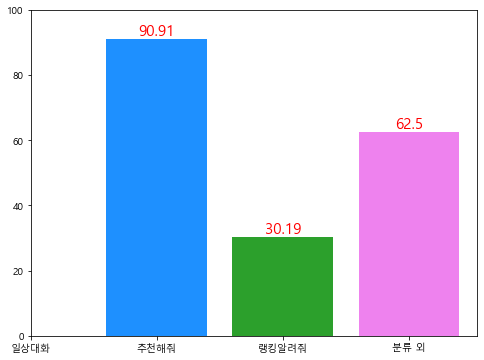

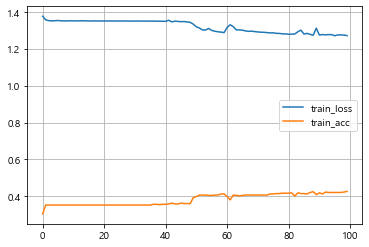

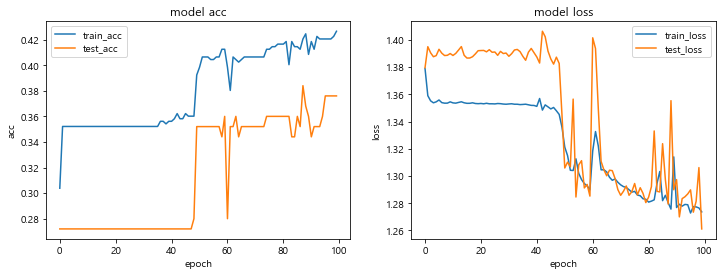

In [40]:
# 각 질문의 적중률
plt.figure(figsize=(8,6))
x = target_names
fashon_type = target_names
values = score_list
colors = ['y', 'dodgerblue', 'C2', 'violet', 'brown', 'indigo', 'aquamarine', 'orange', 'khaki', 'slategray']

plt.bar(x, values, color=colors)
plt.xticks(x, fashon_type)
plt.ylim([0, 100])

for i, v in enumerate(x):
    plt.text(v, values[i], values[i],                 # 좌표 (x축 = v, y축 = y[0]..y[1], 표시 = y[0]..y[1])
             fontsize = 15, 
             color='red',
             horizontalalignment='center',  # horizontalalignment (left, center, right)
             verticalalignment='bottom')    # verticalalignment (top, center, bottom)

plt.show()
# 손실률, 정확도 시각화
plt.plot(history.history['loss'])
#plt.plot(loss)
plt.plot(history.history['accuracy'])
#plt.plot(acc)
plt.legend(['train_loss', 'train_acc'])
plt.grid()
plt.show()

#history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1) # 1행 2열의 도표, 1열
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model acc')
plt.xlabel('epoch')
plt.ylabel('acc')
plt.legend(['train_acc', 'test_acc'])
plt.subplot(1, 2, 2) # 1행 2열의 도표, 2열
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train_loss', 'test_loss'])

### 모델2 시각화

In [41]:
y_pred2=model2.predict(X_test)
y_pred_test2=np.argmax(y_pred2, axis=-1)
print(confusion_matrix(y_pred_test2, y_test))

[[17  0  0  2]
 [ 2 27  2 11]
 [ 0  3 32  0]
 [ 3  1  0 25]]


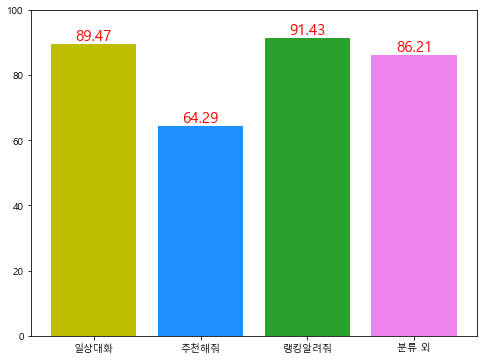

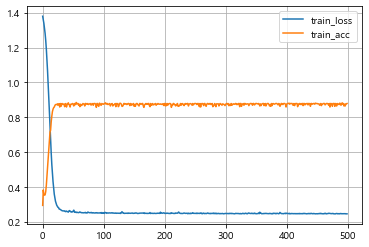

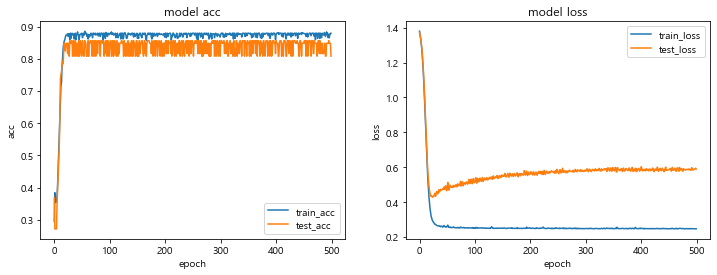

In [43]:
df_model2=pd.DataFrame(confusion_matrix(y_pred_test2, y_test))
# 각 잘문의 적중률 리스트
score_list2=[]
for i in range(4):
    score_list2.append(round((df_model2.iloc[i,i]/df_model2.sum(axis=1)[i])*100, 2))
    
# 각 질문의 적중률
plt.figure(figsize=(8,6))
x = target_names
fashon_type = target_names
values = score_list2
colors = ['y', 'dodgerblue', 'C2', 'violet', 'brown', 'indigo', 'aquamarine', 'orange', 'khaki', 'slategray']

plt.bar(x, values, color=colors)
plt.xticks(x, fashon_type)
plt.ylim([0, 100])

for i, v in enumerate(x):
    plt.text(v, values[i], values[i],                 # 좌표 (x축 = v, y축 = y[0]..y[1], 표시 = y[0]..y[1])
             fontsize = 15, 
             color='red',
             horizontalalignment='center',  # horizontalalignment (left, center, right)
             verticalalignment='bottom')    # verticalalignment (top, center, bottom)

plt.show()
# 손실률, 정확도 시각화
plt.plot(history2.history['loss'])
#plt.plot(loss)
plt.plot(history2.history['accuracy'])
#plt.plot(acc)
plt.legend(['train_loss', 'train_acc'])
plt.grid()
plt.show()

#history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1) # 1행 2열의 도표, 1열
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model acc')
plt.xlabel('epoch')
plt.ylabel('acc')
plt.legend(['train_acc', 'test_acc'])
plt.subplot(1, 2, 2) # 1행 2열의 도표, 2열
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train_loss', 'test_loss'])

### 모델3 시각화

In [44]:
y_pred3=model3.predict(X_test)
y_pred_test3=np.argmax(y_pred3, axis=-1)
print(confusion_matrix(y_pred_test3, y_test))

[[17  0  0  2]
 [ 0 22  0  0]
 [ 0  3 32  0]
 [ 5  6  2 36]]


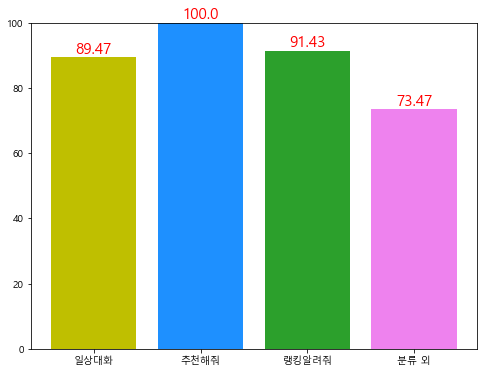

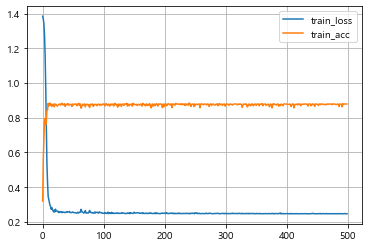

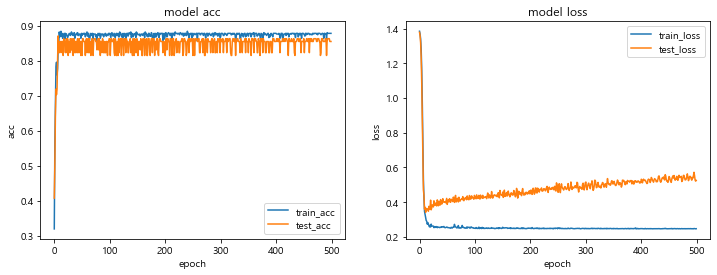

In [45]:
df_model3=pd.DataFrame(confusion_matrix(y_pred_test3, y_test))
# 각 잘문의 적중률 리스트
score_list3=[]
for i in range(4):
    score_list3.append(round((df_model3.iloc[i,i]/df_model3.sum(axis=1)[i])*100, 2))
    
# 각 질문의 적중률
plt.figure(figsize=(8,6))
x = target_names
fashon_type = target_names
values = score_list3
colors = ['y', 'dodgerblue', 'C2', 'violet', 'brown', 'indigo', 'aquamarine', 'orange', 'khaki', 'slategray']

plt.bar(x, values, color=colors)
plt.xticks(x, fashon_type)
plt.ylim([0, 100])

for i, v in enumerate(x):
    plt.text(v, values[i], values[i],                 # 좌표 (x축 = v, y축 = y[0]..y[1], 표시 = y[0]..y[1])
             fontsize = 15, 
             color='red',
             horizontalalignment='center',  # horizontalalignment (left, center, right)
             verticalalignment='bottom')    # verticalalignment (top, center, bottom)

plt.show()
# 손실률, 정확도 시각화
plt.plot(history3.history['loss'])
#plt.plot(loss)
plt.plot(history3.history['accuracy'])
#plt.plot(acc)
plt.legend(['train_loss', 'train_acc'])
plt.grid()
plt.show()

#history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1) # 1행 2열의 도표, 1열
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('model acc')
plt.xlabel('epoch')
plt.ylabel('acc')
plt.legend(['train_acc', 'test_acc'])
plt.subplot(1, 2, 2) # 1행 2열의 도표, 2열
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train_loss', 'test_loss'])